In [85]:
import pandas as pd
import numpy as np

In [86]:
dis_sym_df = pd.read_csv('disease_symptoms.csv')
sym_wgh_df = pd.read_csv('../Symptom-severity.csv')

In [87]:
dis_sym_df.sort_values('Disease',inplace=True)
sym_wgh_df.sort_values('Symptom',inplace=True)


In [88]:
def clean_word(string):
	s=string.lower().split(' ')
	s = [x for x in s if x != '']
	return ' '.join(s)

In [89]:
dis_sym_df['Disease'] = dis_sym_df['Disease'].apply(clean_word)

In [90]:
dis_sym_df['list_of_symptoms'] = dis_sym_df.agg(list,axis=1)

In [91]:
def remove_nan(lst):
	i=0
	while((len(lst) != i) and (lst[i] is not np.nan)):
		i+=1;

	return lst[:i]

In [92]:
def clean_list(lst):
	for i in range(len(lst)):
		lst[i] = clean_word(lst[i])
	return lst

In [93]:
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(remove_nan)
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(clean_list)
dis_sym_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,list_of_symptoms
1186,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
2865,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
1187,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
4136,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
1188,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."


In [94]:
sym_wgh_df['Symptom'] = sym_wgh_df['Symptom'].apply(clean_word)
sym_wgh_df['Symptom'].drop_duplicates(inplace=True)
sym_wgh_df.set_index('Symptom',inplace=True)
sym_wgh_df.head()

,weight
Symptom,
abdominal_pain,4
abnormal_menstruation,6
acidity,3
acute_liver_failure,6
altered_sensorium,2


In [95]:
symptoms = sym_wgh_df.index.unique()

In [96]:
dis_sym_df.fillna(0,inplace=True)

In [97]:
symptoms_df = pd.DataFrame(columns=symptoms,index=dis_sym_df.index)

In [98]:
symptoms_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms']


In [99]:
func = lambda x: sym_wgh_df.loc[symp,'weight'] if symp in x['list_of_symptoms'] else 0
for symp in symptoms:
    symptoms_df[symp] = symptoms_df.apply(func,axis=1)


In [100]:
symptoms_df.drop('list_of_symptoms',axis=1,inplace=True)

In [101]:
symptoms_df['Disease'] = dis_sym_df['Disease']

In [102]:
symptoms_df.head()

Symptom,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
1186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
2865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
1187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
4136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo


In [103]:
labels=symptoms_df['Disease'].values
data = symptoms_df.iloc[:,:-1]


In [104]:
symptoms_df.to_csv("../symptoms-weight.csv")

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,precision_score
import seaborn as sns

In [106]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size=0.85)

In [107]:
x_train

Symptom,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
3054,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,3
2924,0,0,0,0,2,0,0,0,0,0,...,5,0,0,4,0,0,0,0,0,0
2561,4,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,4,3
2070,0,0,3,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
3569,0,0,3,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3668,4,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,4,3
1611,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [108]:
model = SVC(probability=True)


In [109]:
model.fit(x_train, y_train)

preds = model.predict(x_test)

In [110]:
f1 = f1_score(y_test, preds, average='macro') * 100
acu = accuracy_score(y_test, preds)*100
pre=precision_score(y_test,preds,average="weighted")
print('F1-score% = ',f1)
print('Accuracy% = ',acu )
print('Precision = ',pre)


F1-score% =  100.0
Accuracy% =  100.0
Precision =  1.0


<AxesSubplot:>

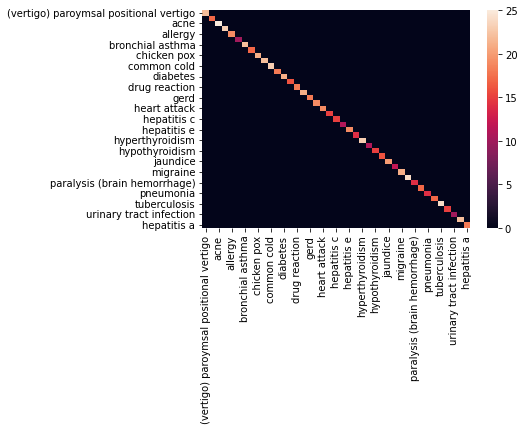

In [111]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=dis_sym_df['Disease'].unique(), columns=dis_sym_df['Disease'].unique())
sns.heatmap(df_cm)


In [112]:
import pickle

with open('../model.pkl','wb') as file:
	pickle.dump(model,file)